{'Llama-3.1-8B-Instruct': {'pt0': {'python': {'overall_accuracy': 0.28623853211009176, 'type_accuracy': {'Assignment': 0.17647058823529413, 'Branch': 0.6555555555555556, 'API': 0.10121457489878542, 'Arithmetic Assignment': 0.19444444444444445, 'Constant Assignment': 0.6764705882352942}, 'type_counts': {'Assignment': 68, 'Branch': 90, 'API': 247, 'Arithmetic Assignment': 72, 'Constant Assignment': 68}}, 'c': {'overall_accuracy': 0.40229885057471265, 'type_accuracy': {'Constant Assignment': 0.7714285714285715, 'Assignment': 0.0625, 'Arithmetic Assignment': 0.0821917808219178, 'Branch': 0.85, 'API': 0.017857142857142856}, 'type_counts': {'Constant Assignment': 35, 'Assignment': 64, 'Arithmetic Assignment': 73, 'Branch': 120, 'API': 56}}}}, 'Qwen2.5-14B-Instruct-1M': {'pt0': {'python': {'overall_accuracy': 0.43486238532110094, 'type_accuracy': {'Assignment': 0.47058823529411764, 'Branch': 0.7666666666666667, 'API': 0.20242914979757085, 'Arithmetic Assignment': 0.4027777777777778, 'Constant

/tmp/ipykernel_1563762/4153417683.py:76: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  plt.legend(handles=handles + bar_plot.legend_.legendHandles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


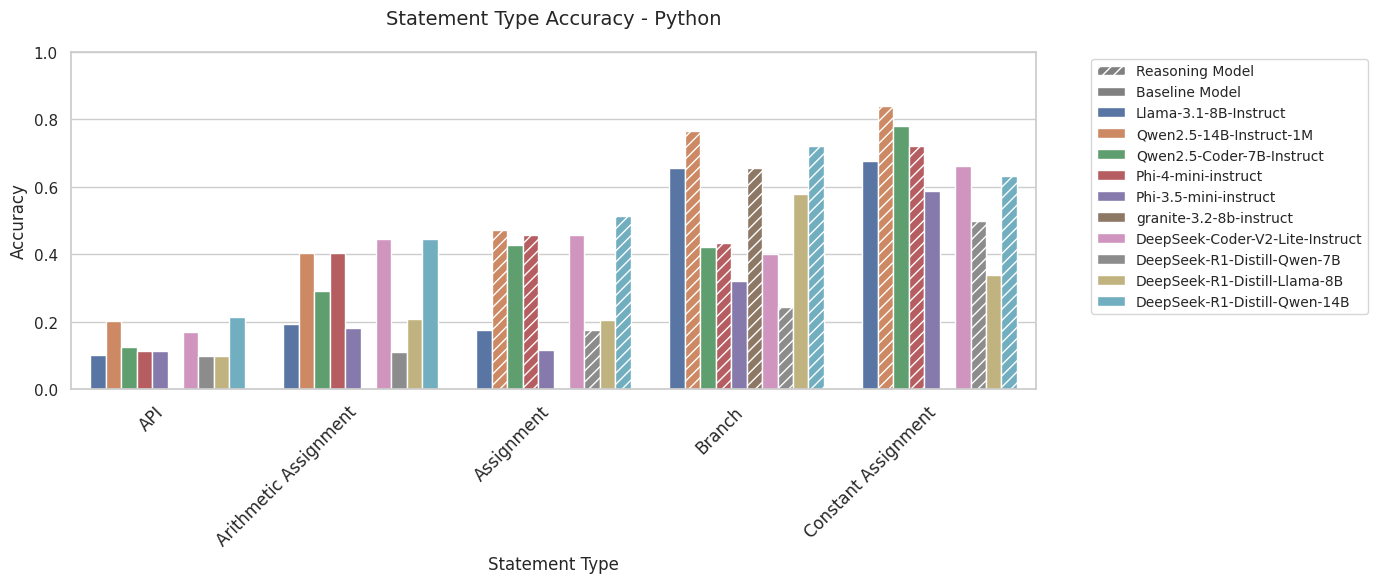

In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches


with open('/home/XXX/CodeSemantic/CodeSemantic/Results/all_results.json') as f:
    results = json.load(f)

print(results)
# Define the reasoning models we want to highlight
reasoning_models = {
    "DeepSeek-R1-Distill-Qwen-7B",
    "DeepSeek-R1-Distill-Llama-8B",
    "DeepSeek-R1-Distill-Qwen-14B"
}

data = []
for model, pt_data in results.items():
    for pt, lang_data in pt_data.items():
        for lang, metrics in lang_data.items():
            data.append({
                'Model': model,
                'Language': lang,
                'Accuracy': metrics['overall_accuracy'],
                'Statement Type': 'Overall',
                'Count': sum(metrics['type_counts'].values())
            })
            for stmt_type, acc in metrics['type_accuracy'].items():
                data.append({
                    'Model': model,
                    'Language': lang,
                    'Accuracy': acc,
                    'Statement Type': stmt_type,
                    'Count': metrics['type_counts'][stmt_type]
                })

df = pd.DataFrame(data)
df['Model Type'] = df['Model'].apply(lambda x: 'Reasoning' if x in reasoning_models else 'Baseline')

sns.set_theme(style="whitegrid")

### Overall Accuracy (All Models)
# plt.figure(figsize=(12, 6), dpi=100)
# overall_df = df[df['Statement Type'] == 'Overall'].copy()
# bar_plot = sns.barplot(data=overall_df, x='Model', y='Accuracy', hue='Language')
# plt.title('Overall Accuracy by Model and Language', fontsize=14, pad=20)
# plt.ylim(0, 1)
# plt.legend(loc='upper right')
# plt.xticks(rotation=45, ha='right', fontsize=12)
# plt.tick_params(axis='x', which='major', pad=10)
# plt.tight_layout()
# plt.savefig('Results/overall_accuracy.png', bbox_inches='tight', dpi=300)
# plt.show()

### Statement Accuracy - Python (All Models, hatch reasoning models)
plt.figure(figsize=(14, 6), dpi=100)
python_df = df[(df['Statement Type'] != 'Overall') & (df['Language'] == 'python')].copy()
stmt_order = python_df.groupby('Statement Type')['Accuracy'].mean().sort_values().index
bar_plot = sns.barplot(data=python_df, x='Statement Type', y='Accuracy', hue='Model', order=stmt_order)

# Apply hatching for reasoning models
model_order = list(python_df['Model'].unique())
for i, bar in enumerate(bar_plot.patches):
    model_idx = i % len(model_order)
    model_name = model_order[model_idx]
    if model_name in reasoning_models:
        bar.set_hatch('///')

# Custom legend for hatch
handles = [
    mpatches.Patch(facecolor='gray', hatch='///', label='Reasoning Model'),
    mpatches.Patch(facecolor='gray', hatch='', label='Baseline Model')
]
plt.legend(handles=handles + bar_plot.legend_.legendHandles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.title('Statement Type Accuracy - Python', fontsize=14, pad=20)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
#plt.savefig('Results/statement_accuracy_python.png', bbox_inches='tight', dpi=300)
plt.show()

In [5]:
reasoning_df = df[df['Model'].isin(reasoning_models)]

# Now, let's group by Statement Type and Model to show the accuracy
reasoning_accuracy = reasoning_df.groupby(['Statement Type', 'Model'])['Accuracy'].mean().reset_index()

# Print the statement accuracy of reasoning models
for _, row in reasoning_accuracy.iterrows():
    print(f"Model: {row['Model']} | Statement Type: {row['Statement Type']} | Accuracy: {row['Accuracy']:.4f}")


Model: DeepSeek-R1-Distill-Llama-8B | Statement Type: API | Accuracy: 0.0486
Model: DeepSeek-R1-Distill-Qwen-14B | Statement Type: API | Accuracy: 0.1073
Model: DeepSeek-R1-Distill-Qwen-7B | Statement Type: API | Accuracy: 0.0486
Model: DeepSeek-R1-Distill-Llama-8B | Statement Type: Arithmetic Assignment | Accuracy: 0.1042
Model: DeepSeek-R1-Distill-Qwen-14B | Statement Type: Arithmetic Assignment | Accuracy: 0.2291
Model: DeepSeek-R1-Distill-Qwen-7B | Statement Type: Arithmetic Assignment | Accuracy: 0.0556
Model: DeepSeek-R1-Distill-Llama-8B | Statement Type: Assignment | Accuracy: 0.1029
Model: DeepSeek-R1-Distill-Qwen-14B | Statement Type: Assignment | Accuracy: 0.2574
Model: DeepSeek-R1-Distill-Qwen-7B | Statement Type: Assignment | Accuracy: 0.0960
Model: DeepSeek-R1-Distill-Llama-8B | Statement Type: Branch | Accuracy: 0.3889
Model: DeepSeek-R1-Distill-Qwen-14B | Statement Type: Branch | Accuracy: 0.4653
Model: DeepSeek-R1-Distill-Qwen-7B | Statement Type: Branch | Accuracy: 0.1